[36 36 36]
(820, 1034)
[23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 23, 22, 22, 22, 22] 22
[[1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 0 0 0 0 1

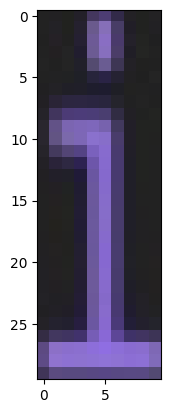

In [910]:
import cv2
import matplotlib.pyplot as plt
import numpy as np


#-----------------------------------------------------------------------------------------------------------

imageslist = []
import os
if os.path.exists("image_file_name.txt") == False:
    with open("image_file_name.txt","w") as f:
        f.write("image_file_name")

if os.path.exists("image_file_name.txt") == True:
    with open("image_file_name.txt","r") as f:
        for line in f:
            line = line.strip()
            if line != "image_file_name":
                if os.path.exists(line) == True:
                    imageslist.append(str(line.strip()))
                else:
                    print(f'image_file : "{line}" は存在しません。')


#-----------------------------------------------------------------------------------------------------------

def removal_background(color_image,RGB,kyoyou): #写真のNumPy配列を渡すと戻り値として背景を１とし、それ以外を0に置き換えた配列が戻ってくる。
    background_color = np.array(RGB)

    code0list = np.ones((color_image.shape[0]*color_image.shape[1],1), dtype='i1') #一旦0で埋める

    sa = np.abs(background_color - color_image)
    sa = sa.reshape(color_image.shape[0]*color_image.shape[1],3) #1ピクセル毎に背景色RGBと写真のRGBの差の絶対値の集合値を算出する為、配列を縦一列、列数３にする。
    text = np.array(np.where((np.sum(sa,axis=1)) > kyoyou)[0]) #背景色判定の許容値を超えた場合文字判定。

    code0list[text, 0] = np.array(0) #code0listに文字判定の場所を再代入。
    code0list = code0list.reshape(color_image.shape[0],color_image.shape[1]) #写真の比率にリサイズ。

    return code0list


def image_removal_background(imagename,RGB,kyoyou):
    #image = Image.open(imagename)
    image = cv2.imread(imagename)
    color_image = np.array(image)
    background_color = np.array(RGB)
    print(background_color)

    dataslist = {}
    dataslist["image"] = image
    dataslist["RGB"] = RGB
    dataslist["kyoyou"] = kyoyou

    code0list = removal_background(color_image,RGB,kyoyou)


    with open("coode0list_printfile.txt","w") as f:
        for y in range(code0list.shape[0]):
            txt = ""
            for x in range(code0list.shape[1]):
                txt = txt + str(code0list[y,x])
            f.write(txt + "\n")
        else:
            print(code0list.shape)

    dataslist["code0list"] = code0list

    return dataslist


#-----------------------------------------------------------------------------------------------------------

import copy

def seach_txtposition(dataslist, Airauto):
    code0list = dataslist["code0list"]
    xlen = code0list.shape[1]

    seach = "background"
    txt_sfy = []

    for y in range(int(code0list.shape[0])):

        if np.sum(code0list[y,:]) != xlen:
            if seach == "background":
                seach = "txt"
                txt_sfy.append([y, ""])

        else:
            if seach == "txt":
                seach = "background"
                txt_sfy[-1][1] = y-1

    seach = "background"
    linetxts_sfyx = []
    Airlist = []
    Airnum,Aircount,txtlen = 0,0,0
    #Aircount,deviation = 1,0

    for line in range(len(txt_sfy)):
        txt_sfyx = []

        for x in range(int(code0list.shape[1])):

            if np.sum(code0list[txt_sfy[line][0]:txt_sfy[line][1],x]) != txt_sfy[line][1]-txt_sfy[line][0]:
                if seach == "background":
                    seach = "txt"
                    txt_sfyx.append( [x , ""] )

            else:
                if seach == "txt":
                    seach = "background"
                    txt_sfyx[-1][1] = x-1

                    if Airauto == "auto":
                        if len(txt_sfyx) >= 2:
                            if abs(Airnum - (txt_sfyx[-1][0] - txt_sfyx[-2][1])) <= 1:
                                if Aircount >= 3:
                                    Airlist.append(txtlen)
                                Aircount += 1
                            else:
                                Airnum = txt_sfyx[-1][0] - txt_sfyx[-2][1]
                                txtlen = txt_sfyx[-1][1] - txt_sfyx[-2][1]
                                Aircount,deviation = 1,0


        linetxts_sfyx.append([txt_sfy[line],txt_sfyx])

    Airlinetxts_sfyx = copy.deepcopy(linetxts_sfyx)

    if Airauto == "auto":
        Airlen = int(sum(Airlist)/len(Airlist))
        print(Airlist,Airlen)
    else:
        Airlen = Airauto

    for line in range(len(linetxts_sfyx)):
        count = 0
        for txtline in range(len(linetxts_sfyx[line][1])-1):
            if linetxts_sfyx[line][1][txtline+1][0] - linetxts_sfyx[line][1][txtline][1] > Airlen:

                Airlinetxts_sfyx[line][1].insert(txtline + count + 1,"Air")
                count += 1

    dataslist["linetxts_sfyx"] = Airlinetxts_sfyx
    return dataslist


#-----------------------------------------------------------------------------------------------------------

def readtxt_imshow(dataslist):
    color_image = np.array(dataslist['image'])
    linetxts_sfyx = dataslist["linetxts_sfyx"]

    for line in linetxts_sfyx:
        a = line[0][0]
        b = line[0][1]
        color_image[a,:] = np.array([0,150,150])
        color_image[b,:] = np.array([0,150,150])
        for txt in range(len(line[1])):
            if line[1][txt] != "Air":
                color_image[a:b,line[1][txt][1]] = np.array([0,150,0])
                color_image[a:b,line[1][txt][0]] = np.array([0,150,0])
            else:
                color_image[a:b,line[1][txt-1][1]+5] = np.array([255,0,0])
                color_image[a:b,line[1][txt+1][0]-5] = np.array([255,0,0])

    return color_image


#-----------------------------------------------------------------------------------------------------------

def txtdatas_insert(dataslist):
    color_image = np.array(dataslist["image"])
    code0list = dataslist["code0list"]
    
    #plt.imshow(color_image[:100,:100])
    linetxts_sfyx = dataslist["linetxts_sfyx"]
    Alltxtimages,txtimages = [],[]
    Alltxtdatas,txtdatas = [],[]


    for line in range(len(linetxts_sfyx)):
        placey = linetxts_sfyx[line][0]
        for txt in range(len(linetxts_sfyx[line][1])):
            if linetxts_sfyx[line][1][txt] != "Air":

                placex = linetxts_sfyx[line][1][txt]
                leny = placey[1] - placey[0]
                lenx = placex[1] - placex[0]

                txtimage = color_image[placey[0]:placey[1],placex[0]:placex[1]]
                txtdata = code0list[placey[0]:placey[1],placex[0]:placex[1]]

                for top in range(leny):
                    if np.sum(txtdata[top,:]) != lenx:
                        txtimage = txtimage[top:,:]
                        txtdata = txtdata[top:,:]
                        break
                
                resizeleny = np.shape(txtdata)[0]

                for lower in range(resizeleny):
                    if np.sum(txtdata[resizeleny-lower -1 ,:]) != lenx:
                        txtimage = txtimage[:resizeleny-lower,:]
                        txtdata = txtdata[:resizeleny-lower,:]
                        break
                
            else:
                txtimage = ""
                txtdata = ""

            txtimages.append(txtimage)
            txtdatas.append(txtdata)
        
        Alltxtimages.append(txtimages)
        Alltxtdatas.append(txtdatas)

        txtimages = []
        txtdatas = []

    dataslist["Alltxtimages"] = Alltxtimages
    dataslist["Alltxtdatas"] = Alltxtdatas
    return dataslist




#-----------------------------------------------------------------------------------------------------------

def print_textdatas(dataslist,writefilename):
    txtdatas = dataslist["Alltxtdatas"]
    lineMaxlenx,lineMaxleny = [],[]

#    with open(writefilename,"w") as f:
    
    Maxlenx = 0
    for line in range(len(txtdatas)):
        lineMaxleny.append(0)
        if len(txtdatas[line]) > Maxlenx:
            Maxlenx = len(txtdatas[line])
        txtline = txtdatas[line]
        for txt in range(len(txtline)):
            if len(txtline[txt]) != 0:
                if np.shape(txtline[txt])[0] > lineMaxleny[line]:
                    lineMaxleny[line] = np.shape(txtline[txt])[0]
                
                

    for nouse in range(Maxlenx):
        lineMaxlenx.append(0)

    for line in range(len(txtdatas)):
        txtline = txtdatas[line]
        for txt in range(len(txtline)):
            if len(txtline[txt]) != 0:
                if np.shape(txtline[txt])[1] > lineMaxlenx[txt]:
                    lineMaxlenx[txt] = np.shape(txtline[txt])[1]
                    
    
    with open(writefilename,"w") as f:
        for line in range(len(txtdatas)):
            printlist = []
            txtline = txtdatas[line]
            thislineMaxY = lineMaxleny[line]

            for nouse in range(thislineMaxY):
                printlist.append("")

            for txt in range(len(txtline)):
                thislineMaxX = lineMaxlenx[txt]

                Textlen = thislineMaxX *2 +1

                if len(txtline[txt]) != 0:
                    ylen,xlen = np.shape(txtline[txt])
                    Airy = thislineMaxY - ylen
                    Airx = (thislineMaxX - xlen)*2

                    y = 0

                    for nouse in range(Airy//2 + Airy%2):
                        printlist[y] = (f"{printlist[y]}{Textlen * ' '} | ")
                        y += 1

                    for txty in txtline[txt]:
                        printlist[y] = (f"{printlist[y]}{(Airx//2 + Airx%2)*' '}{txty}{(Airx//2)*' '} | ")
                        y += 1
                    for nouse in range(Airy//2):
                        printlist[y] = (f"{printlist[y]}{Textlen * ' '} | ")
                        y += 1

                
                else:
                    y = 0
                    for nouse in range(thislineMaxY):
                        printlist[y] = (f"{printlist[y]}{Textlen * ' '} | ")
                        y += 1

            printlen = len(printlist[0][:894])

            if line != 0:
                b = printlen
                if a > b:
                    f.write(f"\n{a*'-'}\n\n")
                else:
                    f.write(f"\n{b*'-'}\n\n")
                a = printlen

            else:
                f.write(f"{printlen*'-'}\n\n")
                a = printlen
                        

            for printline in printlist:
                f.write("| "+printline[:894]+ "\n")

        f.write(f"\n{len(printline[:894])*'-'}")

        
        

#-----------------------------------------------------------------------------------------------------------

for imagename in imageslist:

    dataslist = image_removal_background(imagename,[36,36,36],70)
    dataslist = seach_txtposition(dataslist,"auto")
    dataslist = txtdatas_insert(dataslist)

    print_textdatas(dataslist,"Alltextimages.text")
    txtimage = dataslist["Alltxtimages"]
    txtdata = dataslist["Alltxtdatas"]
    #plt.imshow(readtxt_imshow(dataslist))
    plt.imshow(cv2.resize(txtimage[0][0],dsize=(10,30)))
    print(txtdata[0][0])
    print_textdatas(dataslist,"textdataslist_printfile.txt")
    

In [1137]:
seach_textdatas = []
set_txttype = ""
set_wariai = ""
seach_shape = [0,0]
set_txtdata = []
textdata = ""

with open("Seave_Txtdatas.txt","r") as f:
    for line in f:
        line = line.strip()
        if len(line) == 5 and line[-2:] == " ]":
            #print(line)
            set_txtdata = np.array(set_txtdata).reshape(seach_shape)
            seach_textdatas.append([set_wariai,seach_shape,np.where(set_txtdata==0),set_txttype])
            textdata = textdata + set_txttype
            set_txtdata = []
            set_txttype = line[2]
            seach_num = 1
        elif seach_num == 1:
            set_wariai = float(line)
            seach_num = 2
        elif seach_num == 2:
            for txt in range(len(line)):
                if line[txt] == ",":
                    seach_shape = [int(line[1:txt]),int(line[txt+2:-1])]
            seach_num = 3
        elif seach_num == 3:
            for txt in range(len(line)):
                if line[txt] == "0" or line[txt] == "1":
                    set_txtdata.append(int(line[txt]))

    set_txtdata = np.array(set_txtdata).reshape(seach_shape)
    seach_textdatas.append([set_wariai,np.shape(set_txtdata),np.where(set_txtdata==0),set_txttype])
    textdata = textdata + set_txttype
                    
seach_textdatas = seach_textdatas[1:]

#---------------------------------------------------------------------------------------------------------------

def seach_txt(txtimage,seach_textdatas,kyoyou,dataslist,txt):
    rgb = dataslist["RGB"]
    kyoyoucolor = dataslist["kyoyou"]
    hiritu = np.shape(txtimage)[1]/np.shape(txtimage)[0]        
    Max = 0
    anserline = ""
    for line in range(len(seach_textdatas)):

        if abs(seach_textdatas[line][0] - hiritu) < kyoyou:
            set_image = removal_background(cv2.resize(txtimage,dsize=(seach_textdatas[line][1][1],seach_textdatas[line][1][0])),rgb,kyoyoucolor)
            #print(set_image)
            syougouritu = np.count_nonzero(set_image[seach_textdatas[line][2]] == 0) / np.shape(seach_textdatas[line][2])[1]
            
            if txt != "None" and seach_textdatas[line][3] == txt:
                #print(set_image)
                print(f"\n ▶️ {txt} :{str(syougouritu * 100)}%\n")
                
            if syougouritu > Max:
                Max = syougouritu 
                anserline = seach_textdatas[line][3]


    print(f'▶️▶️ {anserline} :{str(Max * 100)}%')
    return anserline


for i in range(len(seach_textdatas)):
    if seach_textdatas[i][3] != textdata[i]:
        print(i)
    
txtimages = []
line = -3
for i in range(len(txtimage[line])):
    if len(txtimage[line][i]) != 0:
        #plt.imshow(txtimage[0][i])
        txtimages.append(txtimage[line][i])
        
"""
print(f"登録字数{len(seach_textdatas)}\n登録情報 : {textdata}\n検証を開始...")
a = 0 
Truecount = 0
Falsecount = 0

for i in range(len(txtimages)):
    if len(txtimages[i]) != 0:
        anser = seach_txt(txtimages[i],seach_textdatas,0.15,dataslist,"None")
        if textdata[i] != anser:
            Falsecount += 1
            print (f"▶️結果が違う {textdata[i]} → {anser}")
        else:
            Truecount += 1

print(f"検証結果[合致数{Truecount}, 誤検知数{Falsecount}]\n")
"""


'\nprint(f"登録字数{len(seach_textdatas)}\n登録情報 : {textdata}\n検証を開始...")\na = 0 \nTruecount = 0\nFalsecount = 0\n\nfor i in range(len(txtimages)):\n    if len(txtimages[i]) != 0:\n        anser = seach_txt(txtimages[i],seach_textdatas,0.15,dataslist,"None")\n        if textdata[i] != anser:\n            Falsecount += 1\n            print (f"▶️結果が違う {textdata[i]} → {anser}")\n        else:\n            Truecount += 1\n\nprint(f"検証結果[合致数{Truecount}, 誤検知数{Falsecount}]\n")\n'

▶️▶️ i :98.98989898989899%
文字は ' i ' ですか？


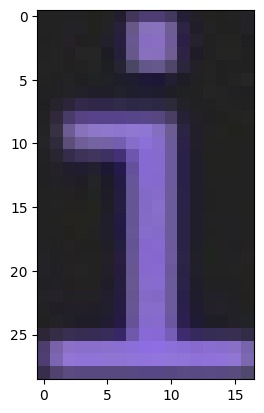

In [1200]:

line,lennum = 0,0
txt = ""

txtimage[line][lennum]
if len(txtimage[line][lennum]) != 0:
    print(f"文字は ' {seach_txt(txtimage[line][lennum],seach_textdatas,0.15,dataslist,txt)} ' ですか？")
    #print(textdata[num])
    plt.imshow(txtimage[line][lennum])

else:
    print(f"文字は Air判定 です。")




In [797]:
for line in seach_textdatas:
    if line[3] == "a":
        for i in line:
            print(i)
        

0.7222222222222222
[18, 13]
(array([ 0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,  3,  3,  3,  3,  3,
        3,  4,  4,  4,  4,  5,  5,  6,  6,  6,  6,  6,  6,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11,
       11, 11, 11, 11, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       16, 17, 17]), array([ 5,  6,  7,  8,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11,  2,  3,  4,
        5,  6,  7,  8,  9, 10, 11, 12,  2,  3,  4,  5,  6,  8,  9, 10, 11,
       12,  2, 10, 11, 12, 11, 12,  7,  8,  9, 10, 11, 12,  3,  4,  5,  6,
        7,  8,  9, 10, 11, 12,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12,
        1,  2,  3,  4,  5,  6, 11, 12,  1,  2,  3,

In [796]:
with open("Seave_Txtdatas.txt","w") as f:
    for line in seach_textdatas:
        #f.write(f"[ {line[3]} ]\n{line[0]}\n{line[1]}\n{line[2]}\n\n")

SyntaxError: incomplete input (2040210652.py, line 3)

In [760]:
#seach_textdatasの作成

seach_textdatas = []
set_txttype = ""
set_wariai = ""
seach_shape = [0,0]
set_txtdata = []

with open("Seave_Txtdatas.txt","r") as f:
    for line in f:
        line = line.strip()
        if len(line) == 5 and line[-2:] == " ]":
            #print(line)
            set_txtdata = np.array(set_txtdata).reshape(seach_shape)
            seach_textdatas.append([set_wariai,np.shape(set_txtdata),np.where(set_txtdata==0),set_txttype])
            set_txtdata = []
            set_txttype = line[2]
            seach_num = 1
        elif seach_num == 1:
            set_wariai = float(line)
            seach_num = 2
        elif seach_num == 2:
            for txt in range(len(line)):
                if line[txt] == ",":
                    seach_shape = [int(line[1:txt]),int(line[txt+2:-1])]
            seach_num = 3
        elif seach_num == 3:
            for txt in range(len(line)):
                if line[txt] == "0" or line[txt] == "1":
                    set_txtdata.append(int(line[txt]))

    set_txtdata = np.array(set_txtdata).reshape(seach_shape)
    seach_textdatas.append([set_wariai,np.shape(set_txtdata),np.where(set_txtdata==0),set_txttype])
            
        
seach_textdatas = seach_textdatas[1:]

for i in range(len(seach_textdatas)):
    if seach_textdatas[i][3] != textdata[i]:
        print(i)
